In [43]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv("data/student_performance.csv")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


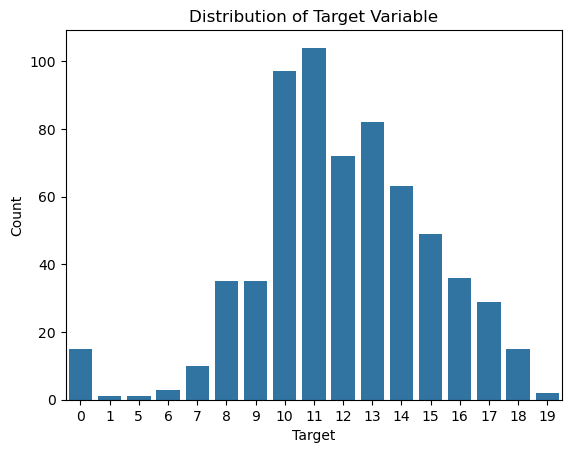

In [9]:
sns.countplot(x='G3', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [10]:
df = df.rename(columns={'G1': 'period_1_grades', 'G2': 'period_2_grades', 'G3': 'final_grade'})

In [11]:
df['passed'] = df['final_grade'].apply(lambda x: True if x >= 10 else False)

In [13]:
percentages = df['passed'].value_counts(normalize=True) * 100
print(percentages)

passed
True     84.59168
False    15.40832
Name: proportion, dtype: float64


84.5% passed based on the threshold.

In [28]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('final_grade')

print(numerical_cols)

df_numerical = df[numerical_cols + ['passed']]


['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'period_1_grades', 'period_2_grades']


In [29]:
df_numerical.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,period_1_grades,period_2_grades,passed
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,True
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,True
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,True
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,True
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,True


In [30]:
missing_values = df_numerical.isnull().sum()
print(missing_values)

age                0
Medu               0
Fedu               0
traveltime         0
studytime          0
failures           0
famrel             0
freetime           0
goout              0
Dalc               0
Walc               0
health             0
absences           0
period_1_grades    0
period_2_grades    0
passed             0
dtype: int64


In [32]:
X = df_numerical.drop(columns=['passed', 'period_1_grades', 'period_2_grades'])
y = df_numerical['passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9282051282051282
Confusion Matrix:
[[ 20   6]
 [  8 161]]


In [42]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(cm_rf)


Accuracy: 0.9384615384615385
Confusion Matrix:
[[ 20   6]
 [  6 163]]


In [44]:
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Accuracy: {accuracy_nb}")
print("Confusion Matrix:")
print(cm_nb)

Accuracy: 0.9076923076923077
Confusion Matrix:
[[ 20   6]
 [ 12 157]]


1. Model Performance Comparison: Which models performed better in terms of accuracy and confusion matrix? Why do you think that is the case?

Random Forest performs best in terms of accuracy (0.93). Then Decision Tree (0.92) and Naive Bayes (0.90). They all predict the same number of true negatives but random forest is better at predicting true positives. I think random forest performed better because it is an ensemble method that uses multiple decision trees to make predictions. It is more robust and less likely to overfit than a single decision tree.

In [45]:
X = df_numerical.drop(columns=['passed', 'period_1_grades', 'period_2_grades'])
y = df_numerical['passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Initialize Decision Tree classifier
dt = DecisionTreeClassifier()
  
# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8307692307692308
Confusion Matrix:
[[ 11  15]
 [ 18 151]]


In [47]:
# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(cm_rf)

Accuracy: 0.8871794871794871
Confusion Matrix:
[[  8  18]
 [  4 165]]


In [48]:
#init Gaussian Naive Bayes
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Accuracy: {accuracy_nb}")
print("Confusion Matrix:")
print(cm_nb)

Accuracy: 0.8769230769230769
Confusion Matrix:
[[ 13  13]
 [ 11 158]]


2. Feature Importance: How important were the features G1, G2, and G3 in predicting the target variable? How would the model performance change if you removed these features from the dataset?

We see that dropping the features G1, G2 and G3 reduces the accuracy of the models. This is because these features are highly correlated with the target variable. The models are able to make better predictions when they have access to these features.

3. Data Preprocessing: How did data preprocessing steps like feature scaling and handling missing values impact the performance of the models?

4. Model Selection: If you had to choose one model for deployment, which one would it be and why? Consider factors like accuracy, interpretability, and computational efficiency.

Ranked by

Accuracy: random forest, decision tree, naive bayes (all over 0.90)

Interpretability: decision tree, naive bayes, random forest

Computational efficiency: naive bayes, decision tree, random forest

Considering all factors, since accuracy is roughly the same for all models, I would choose the decision tree model for deployment. It is the most interpretable model and is quite computationally efficient.

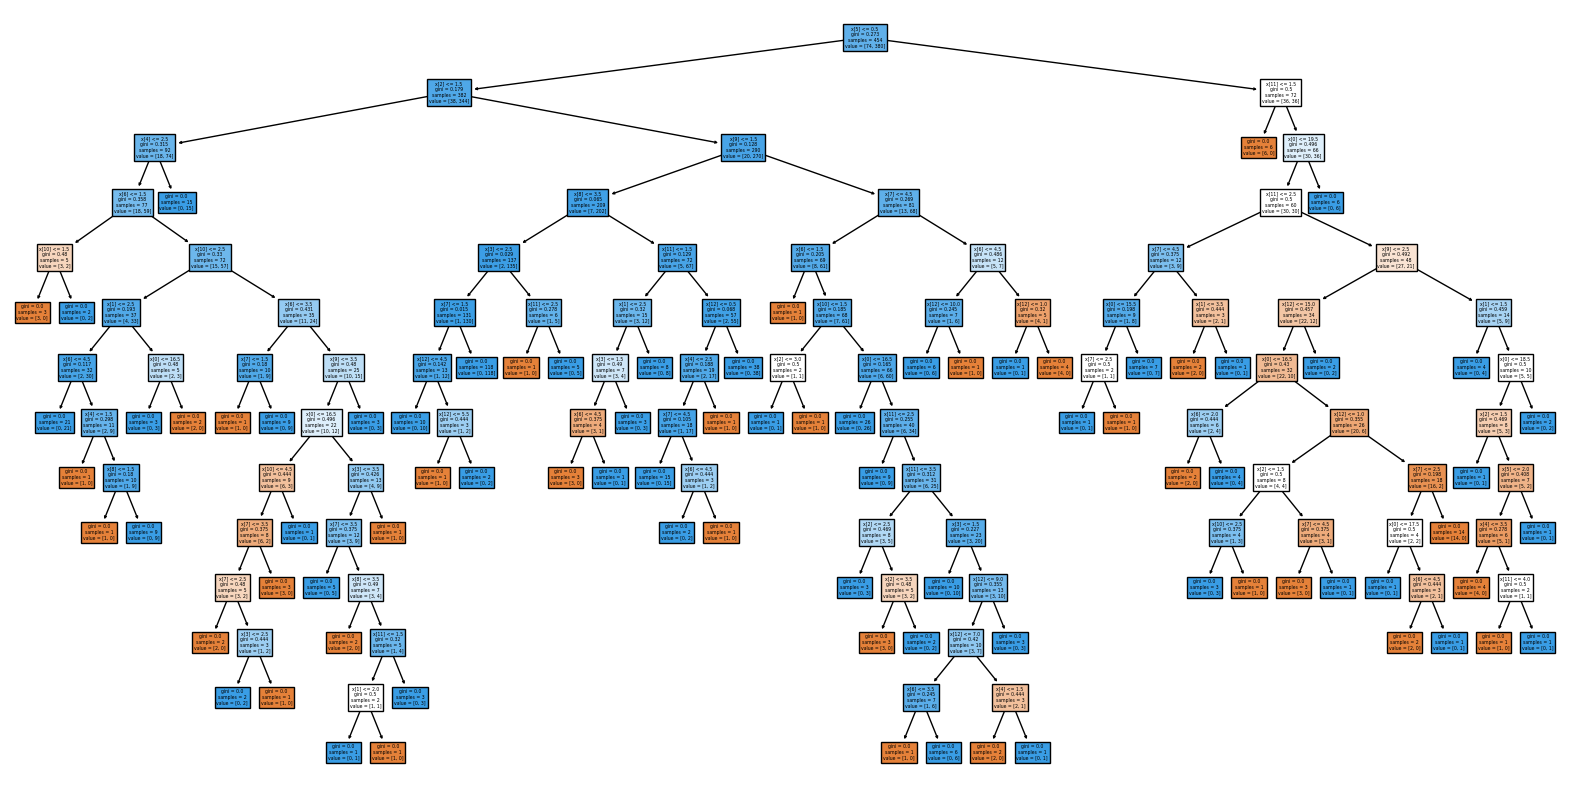

In [54]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True)
plt.show()


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


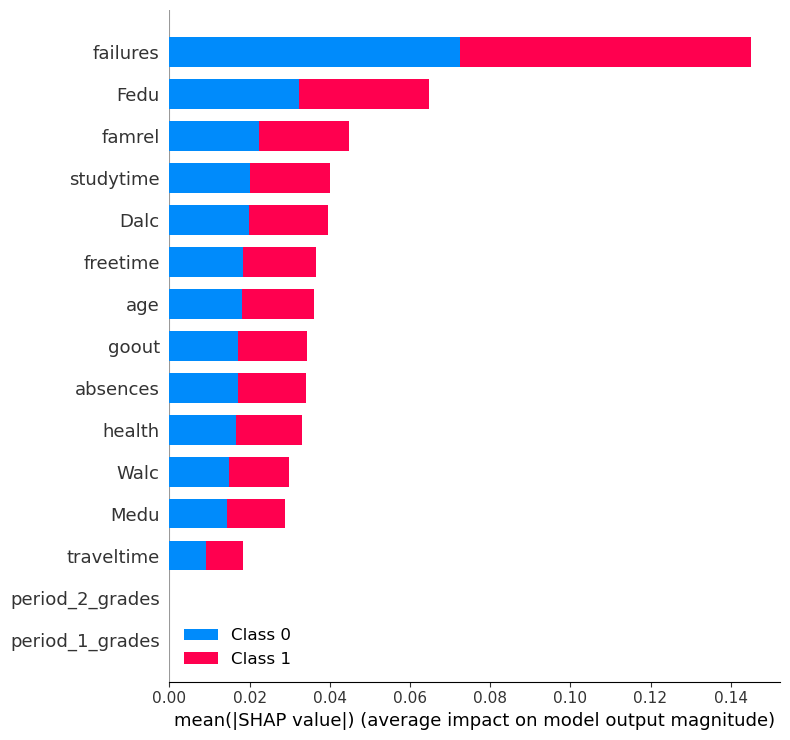

In [56]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)
